## Cars dataset can be found http://mmlab.ie.cuhk.edu.hk/datasets/comp_cars/index.html

* In this notebook only SV data is used which is car images captured in the front view
* The data itself can be found here https://drive.google.com/drive/folders/18EunmjOJsbE5Lh9zA0cZ4wKV6Um46dkg

## Get archives and unzip files

In [ ]:
# Create shortcut of shared CompCars folder and copy content inside to your GoogleDrive or local (to process afterwards)
! cp -r /content/drive/MyDrive/Colab\ Notebooks/Git/CompCars/. /content/drive/MyDrive/Colab\ Notebooks/Git/

# Combine all archive files into one combined archive
! zip -F /content/drive/MyDrive/Colab\ Notebooks/Git/sv_data.zip --out /content/drive/MyDrive/Colab\ Notebooks/Git/sv_combined.zip

# Unzip all arhives
! unzip -P d89551fd190e38 -d /content/drive/MyDrive/Colab\ Notebooks/Git/sv_data/ /content/drive/MyDrive/Colab\ Notebooks/Git/sv_combined.zip

## Process .map files to extract colors/models...etc information about data

### color_list.mat:
  A MATLAB cell matrix containing all color annotations for each image. Each row is the annotation for one image with the first element being the path of the image and the second element being the color id. The meaning of the color ids are: -1 - unrecognized, 0 - black, 1 - white, 2 - red, 3 - yellow, 4 - blue, 5 - green, 6 - purple, 7 - brown, 8 - champagne, 9 - silver.

In [ ]:
from scipy.io import loadmat
import numpy as np
import itertools

# Create dictionary of cars and colors (color will be for each image/car)
raw_colors = loadmat("/content/drive/MyDrive/Colab Notebooks/Git/sv_data/color_list.mat")
color_list = [[element for element in upperElement] for upperElement in raw_colors["color_list"]]
cars_colors = dict(np.array(color_list).reshape(len(color_list), -1))

# List of decoded colors, '-1' values is replaced by '10'
decoded_colors = {"0":"black", "1": "white", "2": "red", "3": "yellow", "4": "blue", "5": "green", 
                  "6": "purple", "7": "brown", "8": "champagne", "9": "silver", "10": "unrecognized", }

set(cars_colors.values())                  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### sv_make_model_name.mat:
  A MATLAB cell matrix containing make and model names for each 'surveillance_model_id'. For one 'surveillance_model_id', sv_make_model_name{surveillance_model_id,1} and sv_make_model_name{surveillance_model_id,2} are the corresponding make and model name. sv_make_model_name{surveillance_model_id,3} is the 'model_id' of the same model in the web-nature data. For each model in the surveillance data, there is a same model in the web-nature data.

In [ ]:
# Create array of cars and mark/model names (mark/model name will be for each image/car)
make_model = loadmat("/content/drive/MyDrive/Colab Notebooks/Git/sv_data/sv_make_model_name.mat")
model_list = [[element for element in upperElement] for upperElement in make_model["sv_make_model_name"]]
numpy_models = np.array(model_list).reshape(len(model_list), -1)
numpy_models[:10] # we are interested in 1st element - 'Mark'/'Make', 2nd - 'Model'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


array([['Besturn', 'Besturn X80', 366],
       ['Hafei', 'Lubao', 716],
       ['Audi', 'Audi Q5', 5],
       ['Audi', 'Audi Q3', 4],
       ['Audi', 'Audi A7', 26],
       ['Audi', 'Audi A1', 19],
       ['Buck', 'Exclle', 194],
       ['Buck', 'encore', 187],
       ['Buck', 'Park Avenue', 195],
       ['Buck', 'Enclave', 202]], dtype=object)

## Create combined Pandas object with metadata and add helpful columns/variables

In [ ]:
import pandas as pd 
import os

# Create list of initial raw list with path/name/color/mark/model
root_images = os.scandir("/content/drive/MyDrive/Colab Notebooks/Git/sv_data/image")
labels_data = [[f"{keyFolders.path}/{imgs.name}", # get full path to the image
                    imgs.name, # only file name
                    cars_colors[f"{keyFolders.name}/{imgs.name}"], # get car's color
                    numpy_models[int(keyFolders.name)-1][0], # get car's mark
                    keyFolders.name, # model (number)
                    numpy_models[int(keyFolders.name)-1][1] # get car's model
               ]
                for keyFolders in root_images for imgs in os.scandir(keyFolders.path)]

# Create pandas DataFrame with all needed metainfo
cars_data_all = pd.DataFrame.from_records(labels_data, columns=["Fullpath", "Filename", "Color", "Mark", "ModelNum", "Model"])

# Change '-1' value of Color to '10' for convenience
cars_data_all.loc[cars_data_all["Color"]==-1, "Color"] = 10
cars_data_all.head(10)

,Fullpath,Filename,Color,Mark,ModelNum,Model
0,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,8b60923ff215b3.jpg,4,Hafei,2,Lubao
1,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,8e66629e721ffd.jpg,4,Hafei,2,Lubao
2,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,b924a600921532.jpg,1,Hafei,2,Lubao
3,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,34ae313e87f2a7.jpg,5,Hafei,2,Lubao
4,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,cbffdb30d118e0.jpg,2,Hafei,2,Lubao
5,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,ab1bea0e6eca76.jpg,1,Hafei,2,Lubao
6,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,2d07a905accd4a.jpg,4,Hafei,2,Lubao
7,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,d432a5620c412a.jpg,1,Hafei,2,Lubao
8,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,d7c463eec585b4.jpg,1,Hafei,2,Lubao
9,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,cd13ebb1db168c.jpg,2,Hafei,2,Lubao


In [ ]:
# Mark train rows
train_idx = (pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Git/sv_data/train_surveillance.txt", header=None))\
  .values\
  .squeeze()\
  .tolist()

cars_data_all["TrainFlag"] = (cars_data_all["ModelNum"] + "/" + cars_data_all["Filename"]).isin(train_idx)
sum(cars_data_all["TrainFlag"])

31148

In [ ]:
# Create dictionary of models
cars_data_all["ModelNum"] = cars_data_all["ModelNum"].astype("str")
decoded_model = dict(cars_data_all[["ModelNum", "Model"]].drop_duplicates().values)
decoded_model

{'1': 'Besturn X80',
 '10': 'Enclave',
 '100': 'Grand Vitara',
 '101': 'Alto',
 '102': 'Citroen C4L',
 '103': 'Triomphe',
 '104': 'C3 Picasso',
 '105': 'Citroen C2',
 '106': 'Citroen C4',
 '107': 'Citroen C5',
 '108': 'Mitsubishi Zinger',
 '109': 'ASX',
 '11': 'Regal',
 '110': 'Grandis',
 '111': 'Outlander abroad version',
 '112': 'Pajero',
 '113': 'Mitsubishi Galant',
 '114': 'Antara',
 '115': 'Zafira’',
 '116': 'Heyue',
 '117': 'Ruifeng',
 '118': 'Ruiying',
 '119': 'Xingrui',
 '12': 'Zhonghua Junjie',
 '120': 'Infiniti G Class',
 '121': 'Landwind X8',
 '122': 'Fshion',
 '123': 'City',
 '124': 'Spirior',
 '125': 'Crosstour',
 '126': 'Jade',
 '127': 'Honda CR-V',
 '128': 'Civic',
 '129': 'Accord',
 '13': 'Zhonghua H330',
 '130': 'Odyssey',
 '131': 'Crider',
 '132': 'Fit',
 '133': 'Elysion',
 '134': 'Mazda 8',
 '135': 'Mazda 2',
 '136': 'Mazda 3',
 '137': 'Mazda 5',
 '138': 'Mazda 6',
 '139': 'Mazda CX-5',
 '14': 'Zhonghua H530',
 '140': 'Mazda CX7',
 '141': 'Aolong',
 '142': 'Ruitu',
 

### Visualize a couple of examples

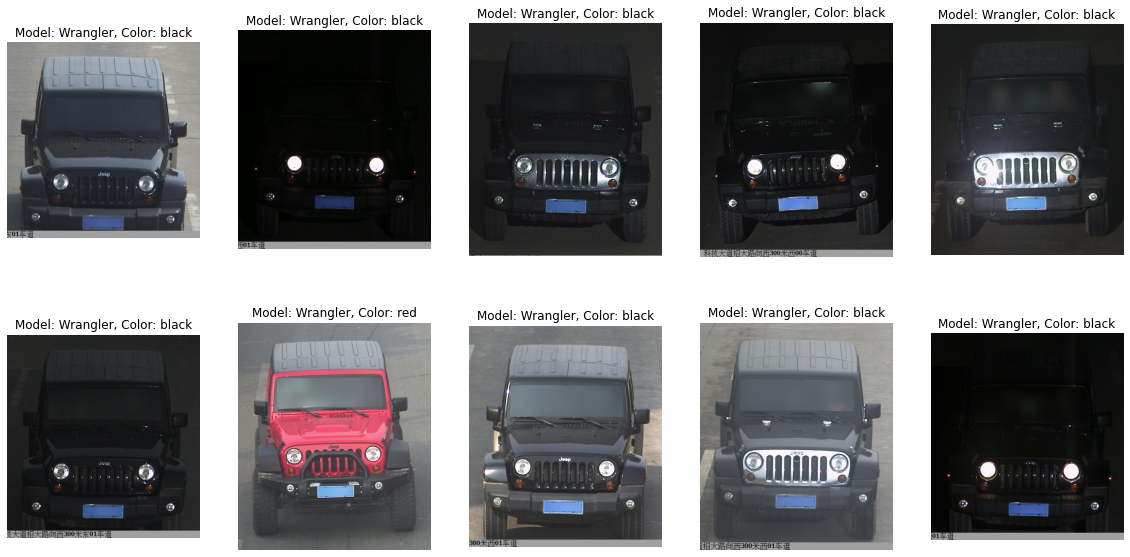

In [ ]:
# Show an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def show_random_image(mark, model, dataframe):
  # Get random image of mark/model from dataframe
  random_image = random.sample(dataframe.query(f"Mark == '{mark}' and Model == '{model}'")[["Fullpath", "Color"]].values.tolist(), 10)
  
  # Read in the image and plot it using matplotlib
  plt.figure(figsize=(20, 10))
  for i in range(10):
    plt.subplot(2, 5, i+1)
    img = mpimg.imread(random_image[i][0])
    plt.title(f"Model: {model}, Color: {decoded_colors[str(random_image[i][1])]}")
    plt.axis("off");
    plt.imshow(img)

  return None

show_random_image("Jeep", "Wrangler", cars_data_all)  

In [ ]:
import tensorflow as tf

# Create image generators without augmentation as we already have enough data for training
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Create batches for train/test
train_data = train_datagen.flow_from_dataframe(cars_data_all[cars_data_all["TrainFlag"]==True],
                                               x_col="Fullpath",
                                               y_col="ModelNum",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_dataframe(cars_data_all[cars_data_all["TrainFlag"]==False],
                                        x_col="Fullpath",
                                        y_col="ModelNum",
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode="categorical")

Found 31148 validated image filenames belonging to 281 classes.
Found 13333 validated image filenames belonging to 281 classes.


## Building a model with Transfer Learning architecture
* it is based on EfficientNetB0 with all layers frozen except last 10
* we add our own top layer

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation


# Setup our base model with layers frozen
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-10]:
  layer.trainable = False


# Setup model architechture
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(len(decoded_model), activation="softmax", name="output_layer")(x)
efficient_model = tf.keras.Model(inputs, outputs)

# Compile the model
efficient_model.compile(loss="categorical_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
efficient_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 281)               359961    
                                                                 
Total params: 4,409,532
Trainable params: 1,253,193
Non-trainable params: 3,156,339
_________________________________________________________________


In [ ]:
# Check if GPU is available
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# Model training
with tf.device('/device:GPU:0'):
  history_efficient = efficient_model.fit(train_data,
                                        epochs=1,
                                        steps_per_epoch=len(train_data),
                                        validation_data=test_data,
                                        validation_steps=int(0.2 * len(test_data))) # will check on 20% of test data to speed up process

974/974 [==============================] - 6340s 6s/step - loss: 1.1399 - accuracy: 0.7619 - val_loss: 0.3273 - val_accuracy: 0.9239


## Model evaluation:
* First thing is to evaluate on a full test dataset to verify overall accuracy (as dataset is balanced we can potentially relly on accuracy metric, anyway percision and recall are also good to check in future)
* Will download a couple of images from internet and test our model

In [ ]:
# Evaluate on a full test dataset
efficient_evaluate = efficient_model.evaluate(test_data)

417/417 [==============================] - 2034s 5s/step - loss: 0.3484 - accuracy: 0.9233


In [ ]:
# Function to prepare image to predict/show
def load_and_prep_image(filename, img_shape=224, scale=False):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    return img/255.
  else:
    return img

>🛠 Create **test** folder and place several test internet images there

In [ ]:
import glob
for i in glob.glob("./test/*.jpg"):
  print(i)

./test/2.jpg
./test/1.jpg
./test/3.jpg


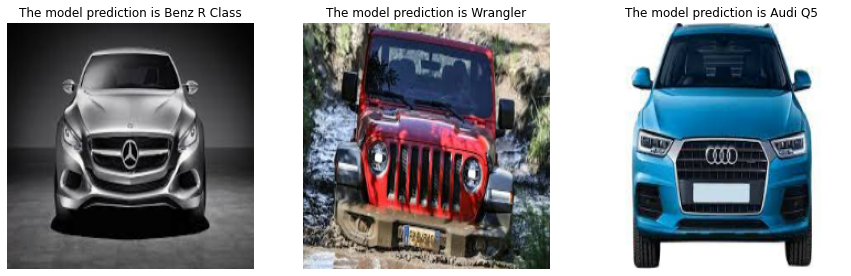

In [ ]:
# Evaluation random images
import matplotlib.pyplot as plt
import numpy as np

encoded_mdl = {j: i for i, j in train_data.class_indices.items()}
plt.figure(figsize=(15, 10))
examples = len(glob.glob("./test/*.jpg"))
for i, img in enumerate(glob.glob("./test/*.jpg")):
  plt.subplot(1, examples, i+1)
  img = load_and_prep_image(img, scale=False) # no need to scale as Efficient base model already scaling the data
  pred_prob = efficient_model.predict(tf.expand_dims(img, axis=0))
  plt.title(f"The model prediction is {decoded_model[encoded_mdl[pred_prob.argmax()]]}")
  plt.imshow(img/255.)
  plt.axis(False)

